## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Seinfeld!
Arguably the greatest sitcom ever made and certainly my most favourite show ever.

[From Wikipedia](https://en.wikipedia.org/wiki/Seinfeld):
> Seinfeld is an American live-action sitcom created by Larry David and Jerry Seinfeld for NBC. Set predominantly in an apartment building in Manhattan's Upper West Side in New York City, the show features a handful of Jerry Seinfeld's (as a fictionalized version of himself) friends and acquaintances, including best friend George Costanza (Jason Alexander), friend and former girlfriend Elaine Benes (Julia Louis-Dreyfus), and neighbor across the hall Cosmo Kramer (Michael Richards). 

This quick description just scratches the surface of what Seinfeld was and still is; an iconic creation that is frequently ranked by publications such as 'Rolling Stone' and 'Entertainment Weekly' as one of the best comnedies ever made and voted by the 'Writers Guild of America' the No. 2 Best Written TV Series of All Time. Seinfeld has become a cultural touchstone and deeply embedded piece of the cultural zeitgeist spawning words like 'close-talker', catch-phrases like "It's gold, Jerry. Gold!", the truly unique "Elaine Dance" and even a new holiday "Festivus"! Seinfeld had an immeasurable impact on the pop-culture landscape but in this notebook, I plan to use Exploratory Data Analysis and Deep Learning on the complete scripts from the show's entire run  and do just a little bit of measuring.

The dataset can be found on kaggle [here](https://www.kaggle.com/thec03u5/seinfeld-chronicles) and consists of 2 tables:
- episode_info.csv
- scripts.csv

<b>episode_info</b> consists of meta-data for each episode, including the episode name and number original air-date

<b>scripts</b> consists of the dialogue spoken by each character and the character that spoke it.

Let's begin by loading the episode_info table into a pandas DataFrame and learning a little more about the show!

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
episodes=pd.read_csv('episode_info.csv',index_col='Unnamed: 0')
episodes.head()

,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
0,1.0,1.0,"Good News, Bad News","July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E01
1,1.0,1.0,The Stakeout,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
2,1.0,2.0,The Robbery,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
3,1.0,3.0,Male Unbonding,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
4,1.0,4.0,The Stock Tip,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04


<b>Seinfeld Trivia!</b>
The original pilot of Seinfeld (originally entitled 'The Seinfeld Chronicles') 'Good News, Bad News' was not picked up! NBC did eventually order 4 additional episodes that make up the first season, a record for smallest episode order in US TV history!
    
We can see this reflected in the data head dispalyed above. There are 2 entries both labelled Season 1, Episode 1 i.e S01E01
To prevent any confusion later on, the pilot episode 'Good News, Bad News' will be re-numbered Season 1, Epsidoe 0 - S01E00

In [6]:
episodes['EpisodeNo'][0]=0
episodes['SEID'][0]='S01E00'
episodes.head()

C:\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
0,1.0,0.0,"Good News, Bad News","July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,1.0,1.0,The Stakeout,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
2,1.0,2.0,The Robbery,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
3,1.0,3.0,Male Unbonding,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
4,1.0,4.0,The Stock Tip,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04


So lets confirm some basic info about the show for anyone who doesn't know

In [7]:
print('Seinfeld ran for',len(episodes.Season.unique()),'seasons consisting of',len(episodes.index), 'episodes')
print('The pilot episode aired on',episodes['AirDate'][0], 'but the first full season began on',episodes['AirDate'][1])
print('The final episode aired on',episodes['AirDate'][173])

Seinfeld ran for 9 seasons consisting of 174 episodes
The pilot episode aired on July 5, 1989 but the first full season began on May 31, 1990
The final episode aired on May 14, 1998


With 174 episodes and 9 seasons, on average each season we would expect to consist of 174/9=19.33 episodes, is this the case?

In [8]:
season_size=episodes.groupby('Season').size()
season_size

Season
1.0     5
2.0    12
3.0    23
4.0    24
5.0    21
6.0    22
7.0    24
8.0    22
9.0    21
dtype: int64

Nope. As I stated before the first season consists of the pilot plus 4 episodes but the second season is also shorter at just 12 episodes. But is this exactly true?

In [9]:
season_lastep= episodes.groupby('Season').max()['EpisodeNo']
season_lastep

Season
1.0     4.0
2.0    12.0
3.0    23.0
4.0    24.0
5.0    22.0
6.0    24.0
7.0    24.0
8.0    22.0
9.0    23.0
Name: EpisodeNo, dtype: float64

These episode numbers are different! The final episode in each season does not match up with the length of each season.


In [10]:
for i in range(1,10):
    if season_size[i]!=season_lastep[i]:
        print('Season {} has inconsistent season length and last episode number; inconsistency = {}'.format(i,season_lastep[i]-season_size[i]))


Season 1 has inconsistent season length and last episode number; inconsistency = -1.0
Season 5 has inconsistent season length and last episode number; inconsistency = 1.0
Season 6 has inconsistent season length and last episode number; inconsistency = 2.0
Season 9 has inconsistent season length and last episode number; inconsistency = 2.0


Season 1, as we know, has been given an episode 0 so this accounts for the difference but what about the other three seasons?

In [86]:
episodes.iloc[81:83][['Season','EpisodeNo','Title']]

,Season,EpisodeNo,Title
81,5.0,18.0,The Raincoats
82,5.0,20.0,The Fire


There's no episdoe 19!
Its ok though, season 2 episode 18 'The Raincoats' is actually a 2 part episode:<br>
https://en.wikipedia.org/wiki/The_Raincoats_(Seinfeld)


In [90]:
episodes.iloc[97:99][['Season','EpisodeNo','Title']]

,Season,EpisodeNo,Title
97,6.0,13.0,The Scofflaw
98,6.0,16.0,The Beard


In season 6 there are 2 numbers missing, episodes 14 and 15.
Again this is a 2 part episode but in this case the episode has been completely cut from the dataset as it is a clip episode and contains little or no new data. <br>
https://en.wikipedia.org/wiki/The_Highlights_of_100

In [92]:
episodes.iloc[172:][['Season','EpisodeNo','Title']]

,Season,EpisodeNo,Title
172,9.0,20.0,The Puerto Rican Day
173,9.0,23.0,The Finale


Episodes 21 and 22 are missing. Again this is a clip episode that has been cut from the dataset already<br>
https://en.wikipedia.org/wiki/The_Chronicle_(Seinfeld)<br>
Episode 23 'The Finale' is also a double episode.

I *know* there are other 2 part episodes, but these appear to have been treated differently to 'The Raincoats' in season 5

In [93]:
episodes.iloc[119:130][['Season','EpisodeNo','Title']]

,Season,EpisodeNo,Title
119,7.0,13.0,The Seven
120,7.0,14.0,The Cadillac (1)
121,7.0,15.0,The Cadillac (2)
122,7.0,16.0,The Shower Head
123,7.0,17.0,The Doll
124,7.0,18.0,The Friars Club (a.k.a. The Gypsies)
125,7.0,19.0,The Wig Master
126,7.0,20.0,The Calzone
127,7.0,21.0,The Bottle Deposit (1)
128,7.0,22.0,The Bottle Deposit (2)


This list  of episodes in Season 7 makes it clear, these two-part episodes here are given annotations to their titles. I don't know why 'The Raincoats' in season 5 is treated differently than the 2 two-part episodes in season 7 but this can be addressed in the corpus of the script texts as needed

In [15]:
for i in episodes['Title']:
    if i.startswith('The')==False:
        print(i)

Good News, Bad News
Male Unbonding


There are just 2 episodes that do not have a title starting with the word 'The' both of these are in the first season. After this it became something of convention for the writers

In [96]:
names=[]
for i in episodes['Writers'].unique():
    names.append(i.replace(' and ',',').rstrip('.').split(','))
names

writers=set(([item.strip() for sublist in names for item in sublist]))
writers

{'Alec Berg',
 'Andy Cowan',
 'Andy Robin',
 'Bill Masters',
 'Bob Shaw',
 'Bruce Eric Kaplan',
 'Bruce Kirschbaum',
 'Buck Dancer (Larry David pseudonym)',
 'Carol Leifer',
 'Charlie Rubin',
 "Dan O'Keefe",
 'Darin Henry',
 'David Mandel',
 'Don McEnery',
 'Elaine Pope',
 'Fred Stoller',
 'Greg Daniels',
 'Gregg Kavet',
 'Jeff Schaffer',
 'Jennifer Crittenden',
 'Jerry Seinfeld',
 'Jill Franklyn',
 'Jon Hayman',
 'Larry Charles',
 'Larry Charles / Story By Marc Jaffe',
 'Larry David',
 'Larry Levin',
 'Lawrence H. Levy',
 'Marjorie Gross',
 'Matt Goldman',
 'Max Pross',
 'Peter Mehlman',
 'Ron Hague',
 'Sam Kass',
 'Spike Feresten',
 'Steve Koren',
 'Steve Lookner',
 "Steve O'Donnell",
 'Steve Skrovan',
 'Tom Gammill',
 'Tom Leopold'}

In [104]:
len(writers)

41

39 different writers worked on the various episodes not  including Marc Jaffe who has only a story credit and Buck Dancer, which is a psuedonym for Larry David

In [98]:
writers_episodes=dict()
for writer in writers:
    writers_episodes[writer]=0
for writer in writers:
    for ep in episodes.Writers:
        if writer in ep:
            writers_episodes[writer]+=1
            
#Manual Corrections:
#'Larry David' and 'Larry Charles' get one more episode credit each, 'Buck Dancer' and 'Marc Jaffe' are removed
writers_episodes['Larry David']+=1
writers_episodes['Larry Charles']+=1
del writers_episodes['Larry Charles / Story By Marc Jaffe']
del writers_episodes['Buck Dancer (Larry David pseudonym)']
writers_episodes

{'Jerry Seinfeld': 18,
 'Alec Berg': 14,
 'Jon Hayman': 1,
 'Bob Shaw': 2,
 'Max Pross': 13,
 'Greg Daniels': 1,
 'Don McEnery': 1,
 'David Mandel': 9,
 'Carol Leifer': 6,
 'Lawrence H. Levy': 1,
 'Sam Kass': 1,
 'Fred Stoller': 1,
 'Bruce Kirschbaum': 3,
 'Steve Koren': 5,
 'Andy Robin': 13,
 'Steve Skrovan': 1,
 'Bill Masters': 3,
 'Ron Hague': 1,
 "Dan O'Keefe": 5,
 'Tom Gammill': 13,
 'Marjorie Gross': 4,
 'Darin Henry': 1,
 'Jeff Schaffer': 14,
 "Steve O'Donnell": 2,
 'Andy Cowan': 1,
 'Bruce Eric Kaplan': 3,
 'Spike Feresten': 9,
 'Larry Levin': 2,
 'Steve Lookner': 1,
 'Tom Leopold': 2,
 'Larry David': 59,
 'Matt Goldman': 2,
 'Jennifer Crittenden': 6,
 'Elaine Pope': 2,
 'Gregg Kavet': 11,
 'Larry Charles': 20,
 'Peter Mehlman': 19,
 'Charlie Rubin': 1,
 'Jill Franklyn': 1}

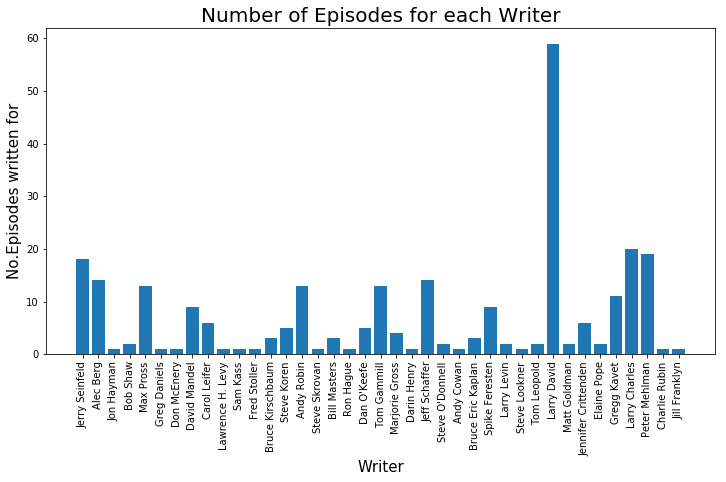

In [99]:
plt.figure(figsize=(12,6))
plt.bar(writers_episodes.keys(),writers_episodes.values())
plt.xlabel('Writer',size=15)
plt.ylabel('No.Episodes written for',size=15)
plt.title('Number of Episodes for each Writer',size=20)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Seinfeld Writers wordcloud')

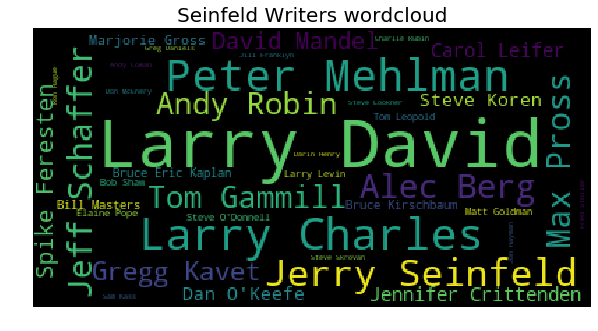

In [56]:
import wordcloud as wc

wordcloud=wc.WordCloud()
wordcloud.fit_words(writers_episodes)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Seinfeld Writers wordcloud',size=20)

In [100]:
writers_df=pd.DataFrame([writers_episodes.keys(),writers_episodes.values()],index=['Writers','No_Episodes'])
writers_df=writers_df.transpose()


In [101]:
writers_df.set_index('Writers',inplace=True)
writers_df

,No_Episodes
Writers,
Jerry Seinfeld,18
Alec Berg,14
Jon Hayman,1
Bob Shaw,2
Max Pross,13
Greg Daniels,1
Don McEnery,1
David Mandel,9
Carol Leifer,6


In [102]:
writers_df.sort_values('No_Episodes',ascending=False)

,No_Episodes
Writers,
Larry David,59
Larry Charles,20
Peter Mehlman,19
Jerry Seinfeld,18
Jeff Schaffer,14
Alec Berg,14
Andy Robin,13
Tom Gammill,13
Max Pross,13
